In [0]:
##importação da lib pandas

import pandas as pd

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

##filmes é um dataframe (um tipo de tabela)

filmes.columns = ["filmeId", "título", "gêneros"] ##mudando os nomes das colunas
filmes.head()  ##mostra apenas as 5 primeiras linhas, pode ser alterado head(15), por exemplo


,filmeId,título,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Tópicos importantes da aula passada:

Tuplas, dic, matplotlip, pandas

Consultando os docstrings no notebook:

In [0]:
?filmes.head # lendo a documentação de um método/atributo

In [0]:
?filmes # lendo a documentação do tipo (docstring)

##Baixando os dados das avaliações dos filmes (outro banco de dados)

In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para saber a quantidade de linhas e de colunas, usa um comando para retornar uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python). O primeiro termo indica o número de linhas e o segundo o número de colunas:


In [0]:
avaliacoes.shape

(100836, 4)

Podemos também usar o comando length, usado nas listas, mas devolve só a quantidade de linhas:

In [0]:
len(avaliacoes)

100836

## Método para separar alguma coluna da tabela

Uma forma para "separar" as informações apenas do filmeId 1 é chamando o método` avaliacaoes.query("filmeId==1")`, esse método retornará apenas as linhas para quais a expressão booleana, `"filmeId==1"`, for `verdadeira`.

Tendo as informações do filmeId 1 podemos chamar o `avaliacoes_do_filme_1.describe(`), para analisar as estatítiscas gerais dos dados.

In [0]:
avaliacoes_filme1 = avaliacoes.query("filmeId==1")  ##estou separando as informações do filme 1
avaliacoes_filme1.head(15)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
1772,18,1,3.5,1455209816
2274,19,1,4.0,965705637
3219,21,1,3.5,1407618878
4059,27,1,3.0,962685262
4879,31,1,5.0,850466616


Existe um comando para mostras os dados da tabela, o describe:

In [0]:
avaliacoes_filme1.describe()  ##vários dados não servem pra análise, como por exemplo a média do filmeId

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Para usar de maneira mais específica, é possível puxar apenas um dos dados da tabela:

In [0]:
avaliacoes_filme1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Usando o describe na tabela das avaliações:

In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes_filme1.describe() ##apenas do filme 1

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Agora preciso puxar só a média da nota. Pra isso eu uso o método de chave : valor.

In [0]:
avaliacoes["nota"]   ##quero apenas a coluna de "nota" da tabela
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_filme1["nota"].mean()  ## método pra mostrar a média das notas do filme 1

3.9209302325581397

Nós calculamos uma média geral, uma média para o `"filmeId==1"`. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método `.groupby(filmeId)`, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.

In [0]:
media_geral = avaliacoes.groupby("filmeId")["nota"].mean()    ##estou agrupando o filmeId com a média das notas
media_geral.round(2).head() #arredondado

filmeId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados filmes.

Poderíamos criar uma nova coluna e atribuir a váriável notas_medias_por_filme, de forma direta:

`filmes["nota_media"] = notas_medias_por_filme`

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o `.join()`, criando um novo dataframe `(filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")).`

Veja como fazer, nas células a seguir:

In [0]:
filmes

,filmeId,título,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
media_geral

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
filmes_com_media = filmes.join(media_geral, on="filmeId")  ##a coluna nota foi adicionada de acordo com o filmeId
filmes_com_media.round(2).head()

,filmeId,título,gêneros,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


A tabela está desornada. É possível ordená-la de maneira crescente usando o `sort_values()`:

In [0]:
filmes_com_media.sort_values("nota", ascending=False).head(15)  ##vou ordenar de acordo com a nota

,filmeId,título,gêneros,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Plotando os dados em gráficos

É possível transformar esses dados em gráficos usando o método `.plot `e o `matplotlib`, que dá pra manipular mais.

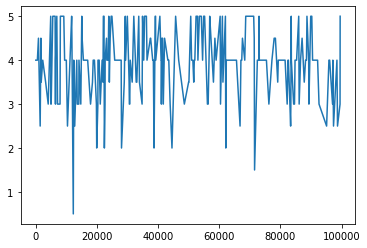

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot()  ##plotando as notas do filme 1

O gráfico ficou ruim pra esse tipo de análise, por isso usa o parâmetro `.kind`

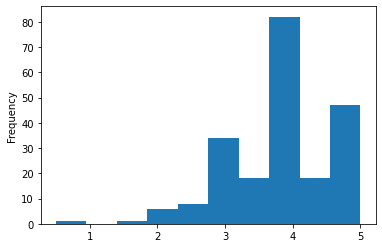

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot(kind='hist')  ##mudando o tipo de gráfico para histograma

Colocando o Título:

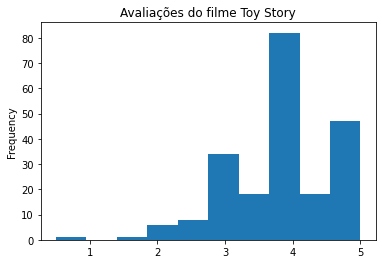

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot(kind='hist', title="Avaliações do filme Toy Story")

## Usando o matplotlib

Trata-se de uma biblioteca que permite manipular gráficos. 

[matplotlib](https://matplotlib.org/)

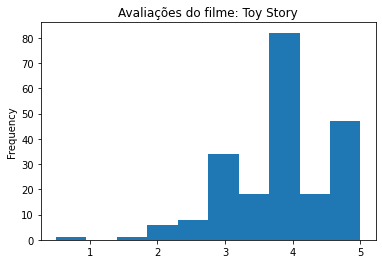

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId==1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme: Toy Story")
plt.show()

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
filmes_com_media.query("nota == 'NaN'") ##comparando a nota de maneira literal com o string 'NaN'



,filmeId,título,gêneros,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


RESPOSTA DOS PROFESSORES:

selecao = filmes_com_media['nota'].isnull()


filmes_com_media[selecao]

```
# This is formatted as code
```



In [0]:
filmes_com_media.query("nota == 'NaN'").shape ##pra mostrar o quanto de linhas e colunas tem


(18, 4)

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
filmes_com_media.columns = ["filmeId", "título", "gêneros", "nota_média"]

filmes_com_media.head()

,filmeId,título,gêneros,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


RESPOSTA DOS PROFESSORES: 

filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})


filmes_com_media.head()

```
# This is formatted as code
```





## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:

contagem_geral = avaliacoes.groupby("filmeId")["nota"].count() 
contagem_geral.head()

##tabela de contagem de acordo com o filmeId

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

RESPOSTA DOS PROFESSORES:

total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()


total_votos_por_filme.head()

In [0]:
filmes_com_contagem = filmes_com_media.join(contagem_geral, on="filmeId")
filmes_com_contagem.columns = ["filmeId", "título", "gêneros", "nota_média", "total"]
filmes_com_contagem.sort_values("total", ascending=False).head(15)  ##vou ordenar de acordo com a contagem


,filmeId,título,gêneros,nota_média,total
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
media_geral.round(2)

filmes_com_contagem.round(2).head(15)



,filmeId,título,gêneros,nota_média,total
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.95,102.0
6,7,Sabrina (1995),Comedy|Romance,3.19,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,8.0
8,9,Sudden Death (1995),Action,3.12,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50,132.0


RESPOSTA DOS PROFESSORES:

filmes_com_media_e_votos['nota_media'] = filmes_com_media_e_votos['nota_media'].round(2)


filmes_com_media_e_votos 

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

*Copiei de um exercício resolvido, pois desconhecia as funções. A lógica na minha cabeça ta no caminho certo*

In [0]:
##generos = filmes["gêneros"].str.split("|", expand=False) o false cria listas do que foi separado, se for true, cria colunas separadas
generos = filmes["gêneros"].str.split("|", expand=True).stack().to_frame("gêneros")
##o stack empilha e o to_frame organiza em uma coluna de gêneros.
generos.stack().unique() ##agrupado por unicidade




array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [0]:
generos

gêneros
0    0  Adventure
     1  Animation
     2   Children
     3     Comedy
     4    Fantasy
...           ...
9738 2    Fantasy
9739 0      Drama
9740 0     Action
     1  Animation
9741 0     Comedy

[22084 rows x 1 columns]

In [0]:
len(generos.stack().unique())-1 ##quantidade de gêneros retirando o não listado

19

RESPOSTA DOS PROFESSORES:

generos_df = filmes_com_media_e_votos.generos.str.get_dummies('|') ##get_dummies é para separar as strings

generos = generos_df.columns.to_list()

generos


PARTE POR PARTE (EXPLICAÇÃO DO GET DUMMIES):

In [0]:
filmes_com_contagem["gêneros"].str.get_dummies('|') #onde tem 1 é true, 0 false. Na primeira linha tem um filme de aventura, animação, para criança, comédia etc

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
filmes_com_contagem["gêneros"].str.get_dummies('|').sum().sort_values(ascending=False) ##por padrão soma por coluna, se quisesse por linha colocava o parâmetro: axis=1

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# ESSA É UMA SÉRIE DE VALORES PORQUE SÓ TEM UMA COLUNA. SE TIVER MAIS DE UMA COLUNA É UM DATAFRAME, COMO O FILMES

os nomes dos gêneros são só os índices

In [0]:
filmes_com_contagem["gêneros"].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [0]:
filmes_com_contagem["gêneros"].str.get_dummies('|').sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

*Copiei de um exercício resolvido, pois desconhecia as funções. A lógica na minha cabeça ta no caminho certo*

In [0]:
total_generos = generos.melt().groupby("value").count().sort_values("variable", ascending=False)
total_generos

,variable
value,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


In [0]:
##RESPOSTA DOS PROFESSORES:

##total_filmes_por_genero = filmes_com_media_e_votos.generos.str.get_dummies().sum()  ##O STR É PRA USAR FUNÇÕES DE STRINGS NO DATAFRAME

##total_filmes_por_genero

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

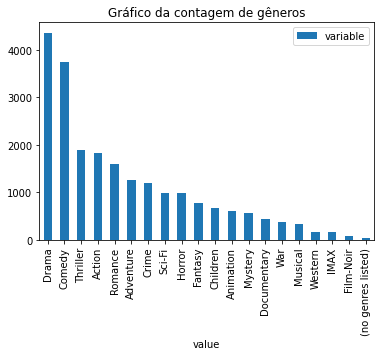

In [0]:

import matplotlib.pyplot as plt

total_generos.plot.bar()
plt.title("Gráfico da contagem de gêneros")
plt.show()

## AULA 2

## ESTUDANDO A MÉDIA E A MEDIANA

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


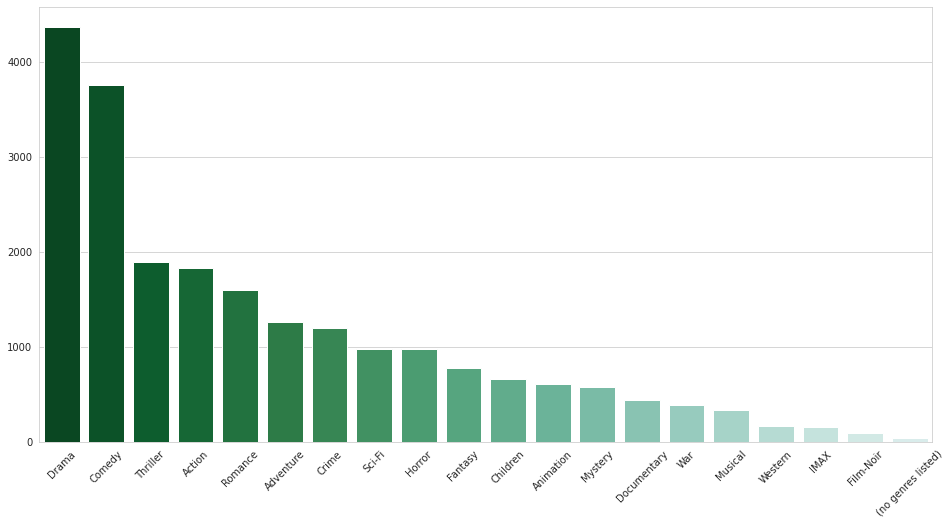

In [0]:
import seaborn as sns  ##vou trabalhar com paletes de cor
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

total_generos = filmes_com_contagem["gêneros"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8)) ##o primeiro parâmetro é do eixo x e o segundo do y
sns.barplot(
      x= total_generos.index,
      y= total_generos.values, ##escolhendo o que vai ser no eixo x e no eixo y
      palette=sns.color_palette("BuGn_r", n_colors=len(total_generos) + 4)
)

degrees = 45
plt.xticks(rotation=degrees)

plt.show()

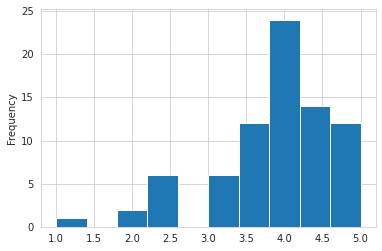

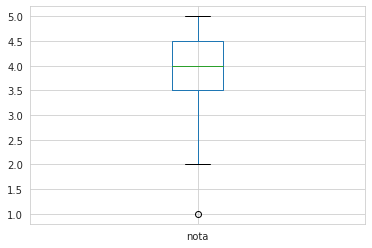

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
import matplotlib.pyplot as plt

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  print()
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(46578)

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
filmes_com_media.sort_values("nota_média", ascending=False)[3400:4000]



,filmeId,título,gêneros,nota_média
891,1188,Strictly Ballroom (1992),Comedy|Romance,3.659091
633,805,"Time to Kill, A (1996)",Drama|Thriller,3.657143
953,1254,"Treasure of the Sierra Madre, The (1948)",Action|Adventure|Drama|Western,3.656250
9006,140110,The Intern (2015),Comedy,3.653846
853,1124,On Golden Pond (1981),Drama,3.653846
...,...,...,...,...
5353,8920,"Country Girl, The (1954)",Drama,3.500000
5348,8915,Stage Beauty (2004),Drama,3.500000
1385,1897,High Art (1998),Drama|Romance,3.500000
5811,31952,Control (Kontroll) (2003),Comedy|Crime|Drama|Mystery,3.500000


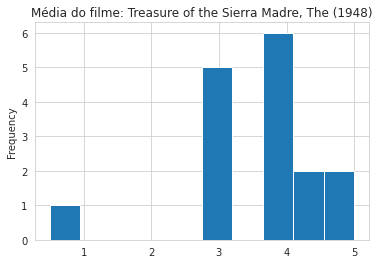

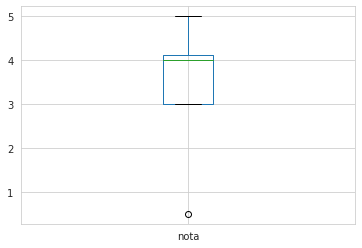

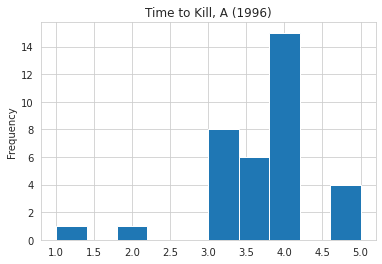

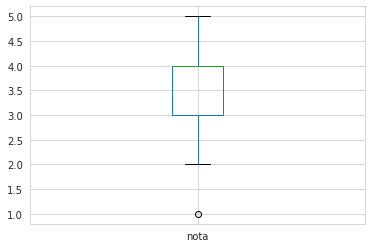

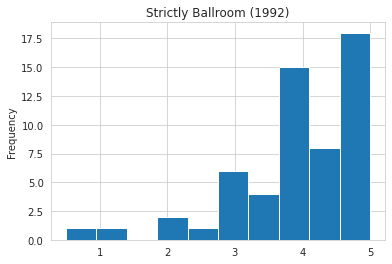

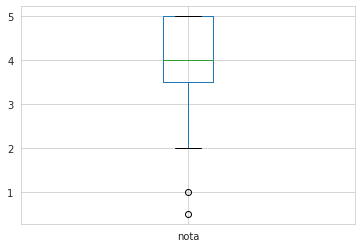

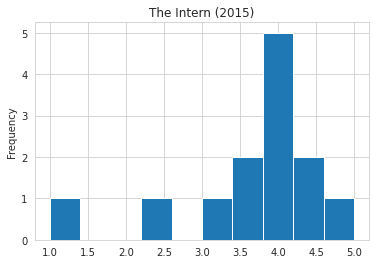

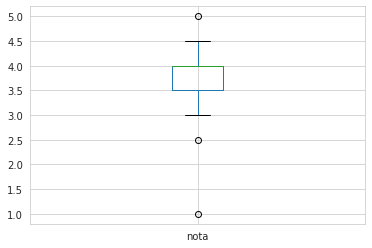

count    13.000000
mean      3.653846
std       1.028442
min       1.000000
25%       3.500000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Média do filme: Treasure of the Sierra Madre, The (1948)")
plot_filme(1254)

print()

plt.title("Time to Kill, A (1996)")
plot_filme(805)

print()


plt.title("Strictly Ballroom (1992)")
plot_filme(1148)

print()

plt.title("The Intern (2015)")
plot_filme(140110)

## DESAFIO 3:

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
filmes_com_contagem.sort_values("total", ascending=False).head(10) ##dataframe com a contagem dos filmes

,filmeId,título,gêneros,nota_média,total
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


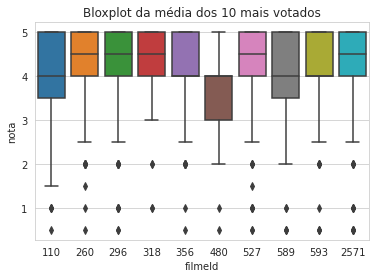

In [0]:
import matplotlib.pyplot as plt

maior_qntd_votos = filmes_com_contagem.sort_values("total", ascending=False).head(10) #variável de uma tabela com os mais votados
plt.title("Bloxplot da média dos 10 mais votados")
sns.boxplot(data = avaliacoes.query("filmeId in [356,318, 296, 593, 2571, 260, 480, 110, 589, 527]"), x ="filmeId", y="nota")
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

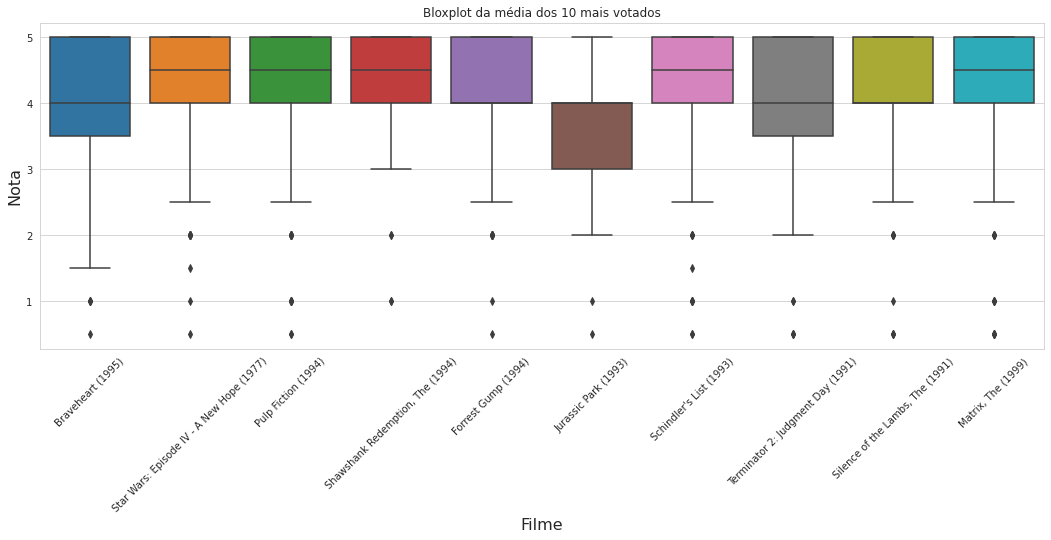

In [0]:
import matplotlib.pyplot as plt



maior_qntd_votos = filmes_com_contagem.sort_values("total", ascending=False).head(10) #variável de uma tabela com os mais votados
plt.figure(figsize=(18,6))
plt.title("Bloxplot da média dos 10 mais votados")
grafico1 = sns.boxplot(data = avaliacoes.query("filmeId in [356,318, 296, 593, 2571, 260, 480, 110, 589, 527]"), x ="filmeId", y="nota")
grafico1.set_xticklabels(filmes.query("filmeId in [356,318,296,593,2571,260,480,110,589,527]")['título'], fontsize=10)
grafico1.set_xlabel("Filme", fontsize=16)
grafico1.set_ylabel("Nota", fontsize=16)  ##mudar o nome dos eixos
degrees = 45
plt.xticks(rotation=degrees) #rotação das ticks
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
loca_filmes = filmes_com_contagem.query("filmeId==172591") #Localizando os filmes
loca_filmes
#Filmes escolhidos para o exercício:
#filme 59306 - a
#filme 3649 - b
#filme 172591 - c



,filmeId,título,gêneros,nota_média,total
9541,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),4.75,2.0


In [0]:
#DADOS FILME 59306 - a




In [0]:
def estatisticas(filme_id):
    notas = avaliacoes.query(f"filmeId=={filme_id}")["nota"]
    titulo = filmes.query(f"filmeId=={filme_id}")["título"]
    media = notas.mean()
    mediana = notas.median()
    moda = notas.mode().values
    print ("Filme: ", titulo.iloc[0], "\n Média: ", media, "\n Mediana: ", mediana, "\n Moda: ", moda)


In [0]:
estatisticas(59306)
print()
estatisticas(3649)
print()
estatisticas(172591)

Filme:  Prom Night (2008) 
 Média:  0.75 
 Mediana:  0.75 
 Moda:  [0.5 1. ]

Filme:  American Gigolo (1980) 
 Média:  2.6875 
 Mediana:  2.75 
 Moda:  [2. 3. 4.]

Filme:  The Godfather Trilogy: 1972-1990 (1992) 
 Média:  4.75 
 Mediana:  4.75 
 Moda:  [4.5 5. ]


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


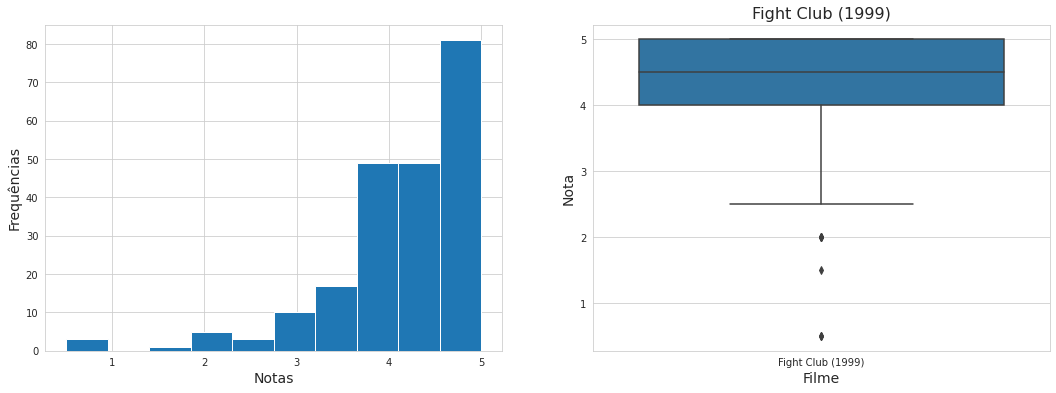

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fight_club = avaliacoes.query("filmeId==2959")['nota']

f, axes = plt.subplots(1, 2, figsize=(18, 6))


grafico2 = fight_club.plot(kind='hist', ax=axes[0])
grafico2.set_xlabel("Notas", fontsize=14)
grafico2.set_ylabel("Frequências", fontsize=14)



filmes_com_contagem.sort_values("total", ascending=False).head(20) #organizei para escolher um filme que teve muitos votos: filmeId=2959
plt.title("Fight Club (1999)", fontsize=16)
grafico1 = sns.boxplot(data=avaliacoes.query("filmeId in[2959]"),x="filmeId", y="nota").ax=axes[1] #escolho o dataframe de avaliações porque eu preciso de toda a variação, o dataframe filmes_com_cotagem só tem o valor médio
grafico1.set_xlabel("Filme", fontsize=14)
grafico1.set_ylabel("Nota", fontsize=14)
grafico1.set_xticklabels(filmes.query("filmeId in[2959]")["título"],fontsize=10)
plt.show()



## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['título'].str.extract("\((\d{4})\)")  #criando uma series em que eu vou extrair componentes de uma coluna: título
del filmes_com_media_e_ano['data'] #estava duplicado
filmes_com_media_e_ano            
#explicando o codigo acima: o primeiro parentese é da expressão. Depois vem \ que indica que vou usar um caracter especial para imprimir, que são os parenteses da data. Aí tem outra expressão (\d{4}), que significa que faz referências a numeros de 0-9, 4 numeros no caso.

#tenho agora uma series só com datas


,filmeId,título,gêneros,nota_média,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017
9739,193585,Flint (2017),Drama,3.500000,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018


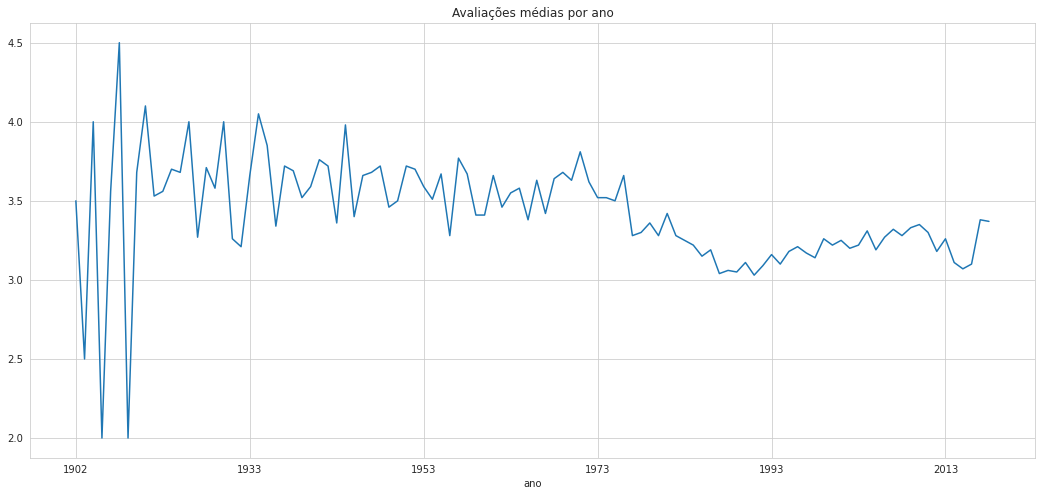

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
media_por_ano = filmes_com_media_e_ano.groupby("ano")["nota_média"].mean().round(2)
plt.title("Avaliações médias por ano") 
media_por_ano.plot()
plt.show()